# Figure 3: Certain RGC types are affected by adaptational and/or NO-induced effects, others are unaffected

# import

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import mannwhitneyu
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# --------------------------------------------------------------------------------------------------------------------

# Load datasets

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'

# Ctrl 1
with open(file_path+'/ctrl_dataset_c1.pkl', 'rb') as handle:
    dict_c1 = pickle.load(handle)
    
# Ctrl 2
with open(file_path+'/ctrl_dataset_c2.pkl', 'rb') as handle:
    dict_c2 = pickle.load(handle)
    
# Ctrl
with open(file_path+'/no_dataset_c.pkl', 'rb') as handle:
    dict_c_no = pickle.load(handle)
    
# DETA/NO
with open(file_path+'/no_dataset_no.pkl', 'rb') as handle:
    dict_d_no = pickle.load(handle)

# --------------------------------------------------------------------------------------------------------------------

# Compute differences

## Ctrl

In [3]:
# select only RGC types, not dACs
rgc_types = np.where(dict_c1['cell_type']<33)[0]

In [4]:
# combine chirp and moving bars
ctrl_c1 = np.hstack((dict_c1['chirp'][rgc_types],dict_c1['bar'][rgc_types]))
ctrl_c2 = np.hstack((dict_c2['chirp'][rgc_types],dict_c2['bar'][rgc_types]))

In [5]:
# get mean responses from Ctrl dataset and its label
mean_chirp_c1 = np.zeros((32,249))
mean_chirp_c2 = np.zeros((32,249))
mean_bar_c1 = np.zeros((32,32))
mean_bar_c2 = np.zeros((32,32))

std_chirp_c1 = np.zeros((32,249))
std_chirp_c2 = np.zeros((32,249))
std_bar_c1 = np.zeros((32,32))
std_bar_c2 = np.zeros((32,32))

for i,j in enumerate(np.unique(dict_c1['cell_type'][rgc_types])):   
    idx = np.where(dict_c1['cell_type']==j)[0]
    mean_chirp_c1[i,:] = np.mean(dict_c1['chirp'][idx,:],axis=0)
    mean_chirp_c2[i,:] = np.mean(dict_c2['chirp'][idx,:],axis=0)
    mean_bar_c1[i,:] = np.mean(dict_c1['bar'][idx,:],axis=0)
    mean_bar_c2[i,:] = np.mean(dict_c2['bar'][idx,:],axis=0)    
    
    std_chirp_c1[i,:] = np.std(dict_c1['chirp'][idx,:],axis=0)
    std_chirp_c2[i,:] = np.std(dict_c2['chirp'][idx,:],axis=0)
    std_bar_c1[i,:] = np.std(dict_c1['bar'][idx,:],axis=0)
    std_bar_c2[i,:] = np.std(dict_c2['bar'][idx,:],axis=0)    

In [6]:
# compute pair-wise, type-wise trace differences
diff_ctrl_dataset = np.mean(ctrl_c2-ctrl_c1,axis=1)
diff_ctrl_dataset = {'diff':diff_ctrl_dataset,'cluster_id':dict_c1['cell_type'][rgc_types].flatten()}
df_diff_ctrl_dataset = pd.DataFrame(diff_ctrl_dataset)

## DETA/NO

In [7]:
# select only RGC types, not dACs
rgc_types = np.where(dict_c_no['cell_type']<33)[0]

In [8]:
# combine chirp and moving bars
ctrl_c = np.hstack((dict_c_no['chirp'][rgc_types],dict_c_no['bar'][rgc_types]))
ctrl_d = np.hstack((dict_d_no['chirp'][rgc_types],dict_d_no['bar'][rgc_types]))

In [9]:
# get mean responses from Ctrl dataset and its label
mean_chirp_c = np.zeros((32,249))
mean_chirp_d = np.zeros((32,249))
mean_bar_c = np.zeros((32,32))
mean_bar_d = np.zeros((32,32))

std_chirp_c = np.zeros((32,249))
std_chirp_d = np.zeros((32,249))
std_bar_c = np.zeros((32,32))
std_bar_d = np.zeros((32,32))

for i,j in enumerate(np.unique(dict_c_no['cell_type'][rgc_types])):   
    idx = np.where(dict_c_no['cell_type']==j)[0]
    mean_chirp_c[i,:] = np.mean(dict_c_no['chirp'][idx,:],axis=0)
    mean_chirp_d[i,:] = np.mean(dict_d_no['chirp'][idx,:],axis=0)
    mean_bar_c[i,:] = np.mean(dict_c_no['bar'][idx,:],axis=0)
    mean_bar_d[i,:] = np.mean(dict_d_no['bar'][idx,:],axis=0)    
    
    std_chirp_c[i,:] = np.std(dict_c_no['chirp'][idx,:],axis=0)
    std_chirp_d[i,:] = np.std(dict_d_no['chirp'][idx,:],axis=0)
    std_bar_c[i,:] = np.std(dict_c_no['bar'][idx,:],axis=0)
    std_bar_d[i,:] = np.std(dict_d_no['bar'][idx,:],axis=0)    

In [10]:
# compute pair-wise, type-wise trace differences
diff_no_dataset = np.mean(ctrl_d-ctrl_c,axis=1)
diff_no_dataset = {'diff':diff_no_dataset,'cluster_id':dict_c_no['cell_type'][rgc_types].flatten()}
df_diff_no_dataset = pd.DataFrame(diff_no_dataset)

# compute differences per cluster

In [11]:
condition_column = np.concatenate((['Ctrl']*len(df_diff_ctrl_dataset),['NO']*len(df_diff_no_dataset))) 
diff_both_datasets = np.concatenate((df_diff_ctrl_dataset['diff'].values,df_diff_no_dataset['diff'].values))
labels_both_datasets = np.concatenate((df_diff_ctrl_dataset['cluster_id'].values,df_diff_no_dataset['cluster_id'].values))

In [12]:
diff_dict = {'diff':diff_both_datasets,'cluster_id':labels_both_datasets,'condition':condition_column}
df_diff = pd.DataFrame(diff_dict)
df_diff = df_diff.explode('diff').reset_index(drop=True)
df_diff = df_diff.assign(diff=df_diff['diff'].astype(np.float32),
                       cluster_id=df_diff['cluster_id'].astype(int),
                       condition=df_diff['condition'].astype('category'))

# --------------------------------------------------------------------------------------------------------------------

# Plotting

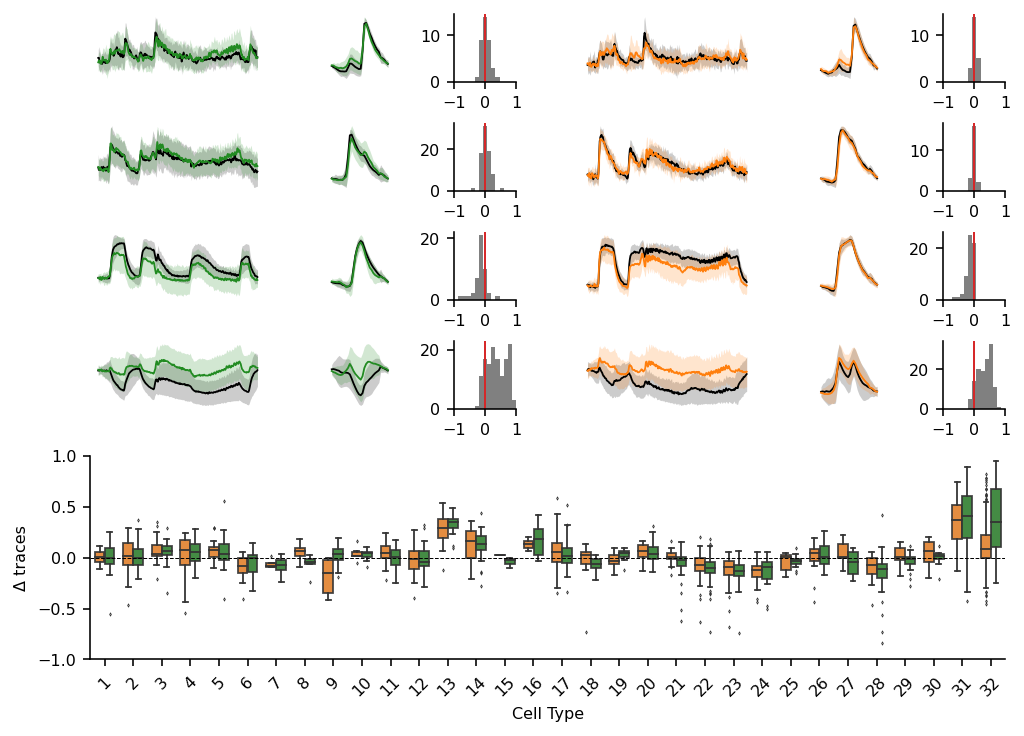

In [13]:
color_ctrl = 'k'
color_ctrl2 = 'tab:orange'
color_no = 'forestgreen'
fs=8

# example types NO
example_stable_1_no = 2
example_stable_2_no = 17
example_modulated_1_no = 28
example_modulated_2_no = 32

# example types time
example_stable_1_ctrl = 1
example_stable_2_ctrl = 21
example_modulated_1_ctrl = 23
example_modulated_2_ctrl = 31


fig = plt.figure(constrained_layout=True,figsize=(7,5))
ax = fig.subplot_mosaic(
    """
    AAAABBCCGGGGHHII
    DDDDEEFFSSSSTTUU
    JJJJKKLLPPPPQQRR
    MMMMNNOOVVVVWWXX
    YYYYYYYYYYYYYYYY
    YYYYYYYYYYYYYYYY
    YYYYYYYYYYYYYYYY
    """)

##### Example 1: Stable
# Ctrl 1: Chirp
i=example_stable_1_no-1
ax['A'].plot()
ax['A'].plot(mean_chirp_c[i,:],color=color_ctrl,lw=0.9)
ax['A'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['A'].axis('off')
#Ctrl 2: Chirp
ax['A'].plot()
ax['A'].plot(mean_chirp_d[i,:],color=color_no,lw=0.9)
ax['A'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['A'].axis('off')

# Ctrl 1: Bar
ax['B'].plot()
ax['B'].plot(mean_bar_c[i,:],color=color_ctrl,lw=0.9)
ax['B'].fill_between(np.arange(0,32,1),mean_bar_c[i,:]+std_bar_c[i,:],mean_bar_c[i,:]-std_bar_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['B'].axis('off')
#Ctrl 2: Bar
ax['B'].plot()
ax['B'].plot(mean_bar_d[i,:],color=color_no,lw=0.9)
ax['B'].fill_between(np.arange(0,32,1),mean_bar_d[i,:]+std_bar_d[i,:],mean_bar_d[i,:]-std_bar_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['B'].axis('off')

# Difference Histogram
ax['C'].hist(df_diff_no_dataset[df_diff_no_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1],edgecolor=None)
ax['C'].set_xlim(-1,1)
ax['C'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['C'].tick_params(axis='both', which='major', labelsize=8)


##### Example 2: Stable
# Ctrl 1: Chirp
i=example_stable_2_no-1
ax['D'].plot()
ax['D'].plot(mean_chirp_c[i,:],color=color_ctrl,lw=0.9)
ax['D'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['D'].axis('off')
#Ctrl 2: Chirp
ax['D'].plot()
ax['D'].plot(mean_chirp_d[i,:],color=color_no,lw=0.9)
ax['D'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['D'].axis('off')

# Ctrl 1: Bar
ax['E'].plot()
ax['E'].plot(mean_bar_c[i,:],color=color_ctrl,lw=0.9)
ax['E'].fill_between(np.arange(0,32,1),mean_bar_c[i,:]+std_bar_c[i,:],mean_bar_c[i,:]-std_bar_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['E'].axis('off')
#Ctrl 2: Bar
ax['E'].plot()
ax['E'].plot(mean_bar_d[i,:],color=color_no,lw=0.9)
ax['E'].fill_between(np.arange(0,32,1),mean_bar_d[i,:]+std_bar_d[i,:],mean_bar_d[i,:]-std_bar_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['E'].axis('off')

# Difference Histogram
ax['F'].hist(df_diff_no_dataset[df_diff_no_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1],edgecolor=None)
ax['F'].set_xlim(-1,1)
ax['F'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['F'].tick_params(axis='both', which='major', labelsize=8)



##########################################################################################################################################
##### Example 2: Small changes
# Ctrl 1: Chirp
i=example_modulated_1_no-1
ax['J'].plot()
ax['J'].plot(mean_chirp_c[i,:],color=color_ctrl,lw=0.9)
ax['J'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['J'].axis('off')
#Ctrl 2: Chirp
ax['J'].plot()
ax['J'].plot(mean_chirp_d[i,:],color=color_no,lw=0.9)
ax['J'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['J'].axis('off')

# Ctrl 1: Bar
ax['K'].plot()
ax['K'].plot(mean_bar_c[i,:],color=color_ctrl,lw=0.9)
ax['K'].fill_between(np.arange(0,32,1),mean_bar_c[i,:]+std_bar_c[i,:],mean_bar_c[i,:]-std_bar_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['K'].axis('off')
#Ctrl 2: Bar
ax['K'].plot()
ax['K'].plot(mean_bar_d[i,:],color=color_no,lw=0.9)
ax['K'].fill_between(np.arange(0,32,1),mean_bar_d[i,:]+std_bar_d[i,:],mean_bar_d[i,:]-std_bar_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['K'].axis('off')

# Difference Histogram
ax['L'].hist(df_diff_no_dataset[df_diff_no_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1],edgecolor=None)
ax['L'].set_xlim(-1,1)
ax['L'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['L'].tick_params(axis='both', which='major', labelsize=8)


##### Example 2: Small changes
# Ctrl 1: Chirp
i=example_modulated_2_no-1
ax['M'].plot()
ax['M'].plot(mean_chirp_c[i,:],color=color_ctrl,lw=0.9)
ax['M'].fill_between(np.arange(0,249,1),mean_chirp_c[i,:]+std_chirp_c[i,:],mean_chirp_c[i,:]-std_chirp_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['M'].axis('off')
#Ctrl 2: Chirp
ax['M'].plot()
ax['M'].plot(mean_chirp_d[i,:],color=color_no,lw=0.9)
ax['M'].fill_between(np.arange(0,249,1),mean_chirp_d[i,:]+std_chirp_d[i,:],mean_chirp_d[i,:]-std_chirp_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['M'].axis('off')

# Ctrl 1: Bar
ax['N'].plot()
ax['N'].plot(mean_bar_c[i,:],color=color_ctrl,lw=0.9)
ax['N'].fill_between(np.arange(0,32,1),mean_bar_c[i,:]+std_bar_c[i,:],mean_bar_c[i,:]-std_bar_c[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['N'].axis('off')
#Ctrl 2: Bar
ax['N'].plot()
ax['N'].plot(mean_bar_d[i,:],color=color_no,lw=0.9)
ax['N'].fill_between(np.arange(0,32,1),mean_bar_d[i,:]+std_bar_d[i,:],mean_bar_d[i,:]-std_bar_d[i,:],alpha=0.2,color=color_no,edgecolor="b", linewidth=0.0)
ax['N'].axis('off')

# Difference Histogram
ax['O'].hist(df_diff_no_dataset[df_diff_no_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1],edgecolor=None)
ax['O'].set_xlim(-1,1)
ax['O'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['O'].tick_params(axis='both', which='major', labelsize=8)

###############################################################################################################################################################################



##### Example 1: Stable
# Ctrl 1: Chirp
i=example_stable_1_ctrl-1
ax['G'].plot()
ax['G'].plot(mean_chirp_c1[i,:],color=color_ctrl,lw=0.9)
ax['G'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['G'].axis('off')
#Ctrl 2: Chirp
ax['G'].plot()
ax['G'].plot(mean_chirp_c2[i,:],color=color_ctrl2,lw=0.9)
ax['G'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['G'].axis('off')

# Ctrl 1: Bar
ax['H'].plot()
ax['H'].plot(mean_bar_c1[i,:],color=color_ctrl,lw=0.9)
ax['H'].fill_between(np.arange(0,32,1),mean_bar_c1[i,:]+std_bar_c1[i,:],mean_bar_c1[i,:]-std_bar_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['H'].axis('off')
#Ctrl 2: Bar
ax['H'].plot()
ax['H'].plot(mean_bar_c2[i,:],color=color_ctrl2,lw=0.9)
ax['H'].fill_between(np.arange(0,32,1),mean_bar_c2[i,:]+std_bar_c2[i,:],mean_bar_c2[i,:]-std_bar_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['H'].axis('off')

# Difference Histogram
ax['I'].hist(df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1])
ax['I'].set_xlim(-1,1)
ax['I'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['I'].tick_params(axis='both', which='major', labelsize=8)

##### Example 2: Stable
# Ctrl 1: Chirp
i=example_stable_2_ctrl-1
ax['S'].plot()
ax['S'].plot(mean_chirp_c1[i,:],color=color_ctrl,lw=0.9)
ax['S'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['S'].axis('off')
#Ctrl 2: Chirp
ax['S'].plot()
ax['S'].plot(mean_chirp_c2[i,:],color=color_ctrl2,lw=0.9)
ax['S'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['S'].axis('off')

# Ctrl 1: Bar
ax['T'].plot()
ax['T'].plot(mean_bar_c1[i,:],color=color_ctrl,lw=0.9)
ax['T'].fill_between(np.arange(0,32,1),mean_bar_c1[i,:]+std_bar_c1[i,:],mean_bar_c1[i,:]-std_bar_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['T'].axis('off')
#Ctrl 2: Bar
ax['T'].plot()
ax['T'].plot(mean_bar_c2[i,:],color=color_ctrl2,lw=0.9)
ax['T'].fill_between(np.arange(0,32,1),mean_bar_c2[i,:]+std_bar_c2[i,:],mean_bar_c2[i,:]-std_bar_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['T'].axis('off')

# Difference Histogram
ax['U'].hist(df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1])
ax['U'].set_xlim(-1,1)
ax['U'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['U'].tick_params(axis='both', which='major', labelsize=8)


##########################################################################################################################################
# Ctrl 1: Chirp
i=example_modulated_1_ctrl-1
ax['P'].plot()
ax['P'].plot(mean_chirp_c1[i,:],color=color_ctrl,lw=0.9)
ax['P'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['P'].axis('off')
#Ctrl 2: Chirp
ax['P'].plot()
ax['P'].plot(mean_chirp_c2[i,:],color=color_ctrl2,lw=0.9)
ax['P'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['P'].axis('off')

# Ctrl 1: Bar
ax['Q'].plot()
ax['Q'].plot(mean_bar_c1[i,:],color=color_ctrl,lw=0.9)
ax['Q'].fill_between(np.arange(0,32,1),mean_bar_c1[i,:]+std_bar_c1[i,:],mean_bar_c1[i,:]-std_bar_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['Q'].axis('off')
#Ctrl 2: Bar
ax['Q'].plot()
ax['Q'].plot(mean_bar_c2[i,:],color=color_ctrl2,lw=0.9)
ax['Q'].fill_between(np.arange(0,32,1),mean_bar_c2[i,:]+std_bar_c2[i,:],mean_bar_c2[i,:]-std_bar_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['Q'].axis('off')

# Difference Histogram
ax['R'].hist(df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1])
ax['R'].set_xlim(-1,1)
ax['R'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['R'].tick_params(axis='both', which='major', labelsize=8)

##### Major changes
# Ctrl 1: Chirp
i=example_modulated_2_ctrl-1
ax['V'].plot()
ax['V'].plot(mean_chirp_c1[i,:],color=color_ctrl,lw=0.9)
ax['V'].fill_between(np.arange(0,249,1),mean_chirp_c1[i,:]+std_chirp_c1[i,:],mean_chirp_c1[i,:]-std_chirp_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['V'].axis('off')
#Ctrl 2: Chirp
ax['V'].plot()
ax['V'].plot(mean_chirp_c2[i,:],color=color_ctrl2,lw=0.9)
ax['V'].fill_between(np.arange(0,249,1),mean_chirp_c2[i,:]+std_chirp_c2[i,:],mean_chirp_c2[i,:]-std_chirp_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['V'].axis('off')

# Ctrl 1: Bar
ax['W'].plot()
ax['W'].plot(mean_bar_c1[i,:],color=color_ctrl,lw=0.9)
ax['W'].fill_between(np.arange(0,32,1),mean_bar_c1[i,:]+std_bar_c1[i,:],mean_bar_c1[i,:]-std_bar_c1[i,:],alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax['W'].axis('off')
#Ctrl 2: Bar
ax['W'].plot()
ax['W'].plot(mean_bar_c2[i,:],color=color_ctrl2,lw=0.9)
ax['W'].fill_between(np.arange(0,32,1),mean_bar_c2[i,:]+std_bar_c2[i,:],mean_bar_c2[i,:]-std_bar_c2[i,:],alpha=0.2,color=color_ctrl2,edgecolor="b", linewidth=0.0)
ax['W'].axis('off')

# Difference Histogram
ax['X'].hist(df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==i+1]['diff'].values,bins=15,color='gray',alpha=1,range=[-1,1])
ax['X'].set_xlim(-1,1)
ax['X'].axvline(0,color='tab:red',lw=0.99,ls='-')
ax['X'].tick_params(axis='both', which='major', labelsize=8)


################################################################################################################################################################################

sns.boxplot(data=df_diff, 
               x="cluster_id", 
               y="diff", 
               hue="condition",
               linewidth=.9,
               palette=dict(Ctrl=color_ctrl2,NO=color_no),
               boxprops=dict(alpha=.9),
               ax=ax['Y'],
               fliersize=0.2,
               width=0.7,
               zorder=1)

ax['Y'].legend([],frameon=False)   
ax['Y'].set_ylabel('\u0394 traces',fontsize=8)
ax['Y'].set_xlabel('Cell Type',fontsize=8)
ax['Y'].set_ylim(-1.,1.)
ax['Y'].axhline(0,lw=0.5,ls='--',color='k')
ax['Y'].tick_params(axis='both', which='major', labelsize=8)
ax['Y'].set_xticklabels(ax['Y'].get_xticklabels(), rotation=45)

sns.despine()

# --------------------------------------------------------------------------------------------------------------------

# Statistics on box plot

### extract types with more than 10 cells per conditions

In [25]:
# extract types with more than 10 cells per conditions
n_cells_per_group_ctrl = np.zeros(32)
n_cells_per_group_no = np.zeros(32)
for i in range(32):
    n_cells_per_group_ctrl[i] = df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==i+1]['diff'].values.shape[0]
    n_cells_per_group_no[i] = df_diff_no_dataset[df_diff_no_dataset['cluster_id']==i+1]['diff'].values.shape[0]

In [26]:
good_types = np.where((n_cells_per_group_ctrl>=10) & (n_cells_per_group_no>=10))[0]
good_types+=1
print(good_types)

[ 1  2  3  4  5 11 12 13 14 17 18 20 21 22 23 24 26 28 29 31 32]


### 1. Test each type and condition against zero

In [27]:
p_values_ctrl = np.zeros(len(good_types))
p_values_no = np.zeros(len(good_types))

for i,j in enumerate(good_types):
    
    ctrl=df_diff_ctrl_dataset[df_diff_ctrl_dataset['cluster_id']==j]['diff'].values
    no=df_diff_no_dataset[df_diff_no_dataset['cluster_id']==j]['diff'].values
    
    p_values_ctrl[i] = stats.ttest_1samp(ctrl, popmean=0.0)[1]
    p_values_no[i] = stats.ttest_1samp(no, popmean=0.0)[1]
    
alpha_bonf_corrected = 0.05/len(good_types)

In [28]:
print('Stable RGC types (Ctrl): '+str(good_types[p_values_ctrl>=alpha_bonf_corrected]))

Stable RGC types (Ctrl): [ 1  2  3  4  5 11 12 18 20 21 26 29]


In [29]:
print('Stable RGC types (NO): '+str(good_types[p_values_no>=alpha_bonf_corrected]))

Stable RGC types (NO): [ 1  2  3  4  5 11 12 17 20 21 26 29]


In [30]:
print('Adaptational RGC types (Ctrl): '+str(good_types[p_values_ctrl<=alpha_bonf_corrected]))
print('Control')
for i in range(len(good_types[p_values_ctrl<alpha_bonf_corrected])):
    print('Type: '+str(good_types[p_values_ctrl<alpha_bonf_corrected][i])+'; p: '+str(p_values_ctrl[p_values_ctrl<alpha_bonf_corrected][i]))

Adaptational RGC types (Ctrl): [13 14 17 22 23 24 28 31 32]
Control
Type: 13; p: 1.4655900724774894e-06
Type: 14; p: 0.0002629110692553671
Type: 17; p: 0.001073973499896691
Type: 22; p: 1.8774763601461458e-09
Type: 23; p: 1.6931869845824284e-09
Type: 24; p: 6.494229771366726e-08
Type: 28; p: 0.0010277418130796483
Type: 31; p: 5.263020639210229e-35
Type: 32; p: 2.6564982849846344e-16


In [31]:
print('Adaptational&NO RGC types (NO): '+str(good_types[p_values_no<=alpha_bonf_corrected]))
print('Nitric Oxide')
for i in range(len(good_types[p_values_no<alpha_bonf_corrected])):
    print('Type: '+str(good_types[p_values_no<alpha_bonf_corrected][i])+'; p: '+str(p_values_no[p_values_no<alpha_bonf_corrected][i]))

Adaptational&NO RGC types (NO): [13 14 18 22 23 24 28 31 32]
Nitric Oxide
Type: 13; p: 6.228785122590721e-10
Type: 14; p: 3.7646726882819796e-06
Type: 18; p: 3.941520213283757e-05
Type: 22; p: 1.302361001069171e-07
Type: 23; p: 2.423358894588126e-13
Type: 24; p: 0.001478507850036876
Type: 28; p: 9.828965438875284e-06
Type: 31; p: 6.422656248568629e-21
Type: 32; p: 2.57391007809513e-27


### 2. Boxplot: Adaptational or adaptational&NO (Ctrl and NO different)

In [32]:
p_values_mannu=np.zeros(len(good_types))
p_values_ttest=np.zeros(len(good_types))
p_values_tests=np.zeros((2,len(good_types)))

for j,i in enumerate(good_types):
    ctrl=df_diff[(df_diff['cluster_id']==i)&(df_diff['condition']=='Ctrl')]['diff'].values
    no=df_diff[(df_diff['cluster_id']==i)&(df_diff['condition']=='NO')]['diff'].values
  
    p_value_shapiro_ctrl = stats.shapiro(ctrl)[1]
    p_value_shapiro_no = stats.shapiro(no)[1]
    
    p_values_mannu[j] = stats.mannwhitneyu(ctrl, no)[1]
    p_values_ttest[j] = stats.ttest_ind(ctrl, no)[1]
    
    if (p_value_shapiro_ctrl>0.05) and (p_value_shapiro_no>0.05):
        p_values_tests[0,j] = 0
        p_values_tests[1,j] = p_values_ttest[j]

    else:
        p_values_tests[0,j] = 1
        p_values_tests[1,j] = p_values_mannu[j]

In [33]:
print('Population RGC types not different: '+str(good_types[p_values_tests[1,:]>=alpha_bonf_corrected]))
print('Population RGC types different: '+str(good_types[p_values_tests[1,:]<=alpha_bonf_corrected]))

Population RGC types not different: [ 1  2  3  4  5 11 12 13 14 17 20 21 22 23 24 26 28 29 31]
Population RGC types different: [18 32]
